# Notebook Intro:

In this notebook, I use my cleaned training data, then focus only on the discrete and continuous features.

**Note: This notebook deals primarily with continuous and discrete features. See notebook 3a for addressing nominal features (also known as categorical features), and notebook 4 for addressing ordinal features**

I mostly perform EDA of both features in this notebook to see any trends.

I also try looking at whether adding a column that combines month and year will provide additional information, but graphing the relationship to Sale Price shows no trend, so I don't add this column to the dataframe.

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [14]:
# import cleaned training data
filepath = '../datasets/interim_files/train_clean.csv'

df = pd.read_csv(filepath)

In [15]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,none,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,none,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,none,none,none,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,none,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,none,none,none,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,none,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,none,none,none,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,none,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,none,none,none,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,none,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,none,none,none,0,3,2010,WD,138500


In [16]:
# From Step_3- Notebook

# continuous features - per the data dictionary
continuous_features = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val']

# nominal features - per the data dictionary
nominal_features = ['PID','MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature','Sale Type']

# discrete features 
discrete_features = ['Year Built','Year Remod/Add','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars','Mo Sold','Yr Sold']

# Ordinal Features
ordinal_features = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']

## Explore Continuous features

In [17]:
df[continuous_features]

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
0,0.0,13517,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,475.0,0,44,0,0,0,0,0
1,43.0,11492,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,559.0,0,74,0,0,0,0,0
2,68.0,7922,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,246.0,0,52,0,0,0,0,0
3,73.0,9802,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,400.0,100,0,0,0,0,0,0
4,82.0,14235,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,484.0,0,59,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,79.0,11449,0.0,1011.0,0.0,873.0,1884.0,1728,0,0,1728,520.0,0,276,0,0,0,0,0
2022,0.0,12342,0.0,262.0,0.0,599.0,861.0,861,0,0,861,539.0,158,0,0,0,0,0,0
2023,57.0,7558,0.0,0.0,0.0,896.0,896.0,1172,741,0,1913,342.0,0,0,0,0,0,0,0
2024,80.0,10400,0.0,155.0,750.0,295.0,1200.0,1200,0,0,1200,294.0,0,189,140,0,0,0,0


In [18]:
df[continuous_features].describe()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
count,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
mean,57.931885,10038.427937,99.843534,442.010365,48.380553,566.524186,1056.915104,1162.434353,328.574531,5.580948,1496.589832,472.959526,94.153998,47.002468,22.548371,2.623396,16.715202,2.427443,52.210760
std,33.046205,6707.696525,175.050567,460.792112,165.804215,444.362373,449.006257,391.544288,425.284319,51.379446,498.902093,216.184467,128.923298,66.076293,59.760393,25.383222,57.697759,38.014135,576.893785
min,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,7500.000000,0.000000,0.000000,0.000000,220.000000,793.000000,879.250000,0.000000,0.000000,1126.250000,317.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,9402.500000,0.000000,368.000000,0.000000,474.000000,994.000000,1092.000000,0.000000,0.000000,1442.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,11498.000000,161.750000,733.000000,0.000000,810.000000,1315.500000,1402.000000,689.000000,0.000000,1728.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,159000.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000


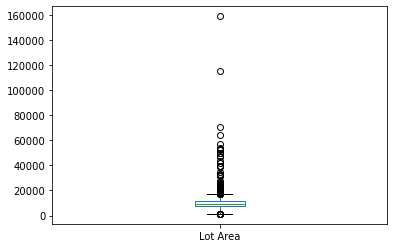

In [19]:
df['Lot Area'].plot.box()

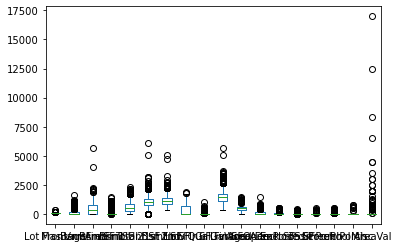

In [20]:
df[continuous_features].drop(columns = 'Lot Area').plot.box();

In [21]:
(pd.concat([df[continuous_features],df['SalePrice']], axis = 1)).corr()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
Lot Frontage,1.000000,0.134701,0.103000,0.058840,0.000989,0.148630,0.207842,0.228337,-0.009814,0.011632,0.172033,0.173564,0.012429,0.087585,0.013269,0.008188,0.037053,0.093139,0.026334,0.179545
Lot Area,0.134701,1.000000,0.172039,0.218108,0.043750,0.045187,0.284708,0.368299,0.032311,0.001721,0.316765,0.263302,0.160294,0.131124,0.009339,0.020189,0.069676,0.116669,0.095356,0.295845
Mas Vnr Area,0.103000,0.172039,1.000000,0.321731,-0.016924,0.085388,0.408432,0.397503,0.100599,-0.061985,0.391336,0.384847,0.163445,0.165526,-0.106724,0.011076,0.086412,0.012371,0.079162,0.512699
BsmtFin SF 1,0.058840,0.218108,0.321731,1.000000,-0.050523,-0.473296,0.539191,0.469961,-0.167332,-0.078833,0.218072,0.330599,0.216519,0.141211,-0.085037,0.048112,0.094089,0.076484,0.130990,0.424380
BsmtFin SF 2,0.000989,0.043750,-0.016924,-0.050523,1.000000,-0.231610,0.088206,0.099754,-0.086888,-0.003044,0.003908,0.016292,0.106078,-0.001269,0.005083,-0.024514,0.095815,0.060928,-0.005751,0.019387
Bsmt Unf SF,0.148630,0.045187,0.085388,-0.473296,-0.231610,1.000000,0.418411,0.309230,-0.010485,0.060305,0.239961,0.147231,-0.033600,0.117518,-0.008186,0.020838,-0.055203,-0.039321,-0.005685,0.191275
Total Bsmt SF,0.207842,0.284708,0.408432,0.539191,0.088206,0.418411,1.000000,0.825165,-0.214185,-0.022344,0.462718,0.491001,0.228120,0.260751,-0.093494,0.060945,0.077309,0.062076,0.126679,0.631975
1st Flr SF,0.228337,0.368299,0.397503,0.469961,0.099754,0.309230,0.825165,1.000000,-0.264716,-0.010025,0.558124,0.504053,0.235712,0.244790,-0.050056,0.068794,0.092379,0.132771,0.142593,0.623523
2nd Flr SF,-0.009814,0.032311,0.100599,-0.167332,-0.086888,-0.010485,-0.214185,-0.264716,1.000000,0.014943,0.646227,0.121057,0.105615,0.171589,0.022329,-0.033221,0.035885,0.012845,0.004606,0.250946
Low Qual Fin SF,0.011632,0.001721,-0.061985,-0.078833,-0.003044,0.060305,-0.022344,-0.010025,0.014943,1.000000,0.107855,-0.071175,-0.017573,-0.005444,0.090614,-0.003598,0.013842,-0.006940,-0.005877,-0.041153


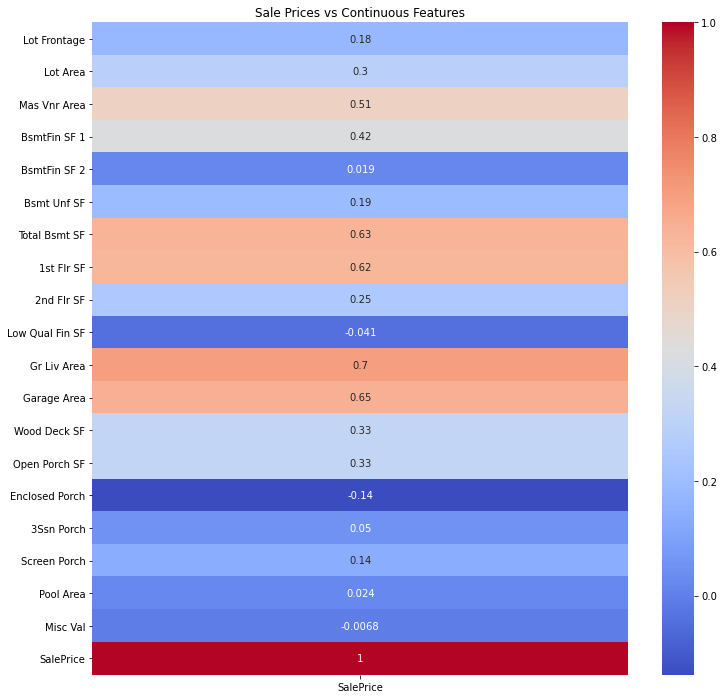

In [23]:
plt.figure(figsize=(12,12))

plt.title('Sale Prices vs Continuous Features')

sns.heatmap((pd.concat([df[continuous_features],df['SalePrice']], axis = 1)).corr()[['SalePrice']],
           annot=True,
           cmap = 'coolwarm');

<Figure size 864x864 with 0 Axes>

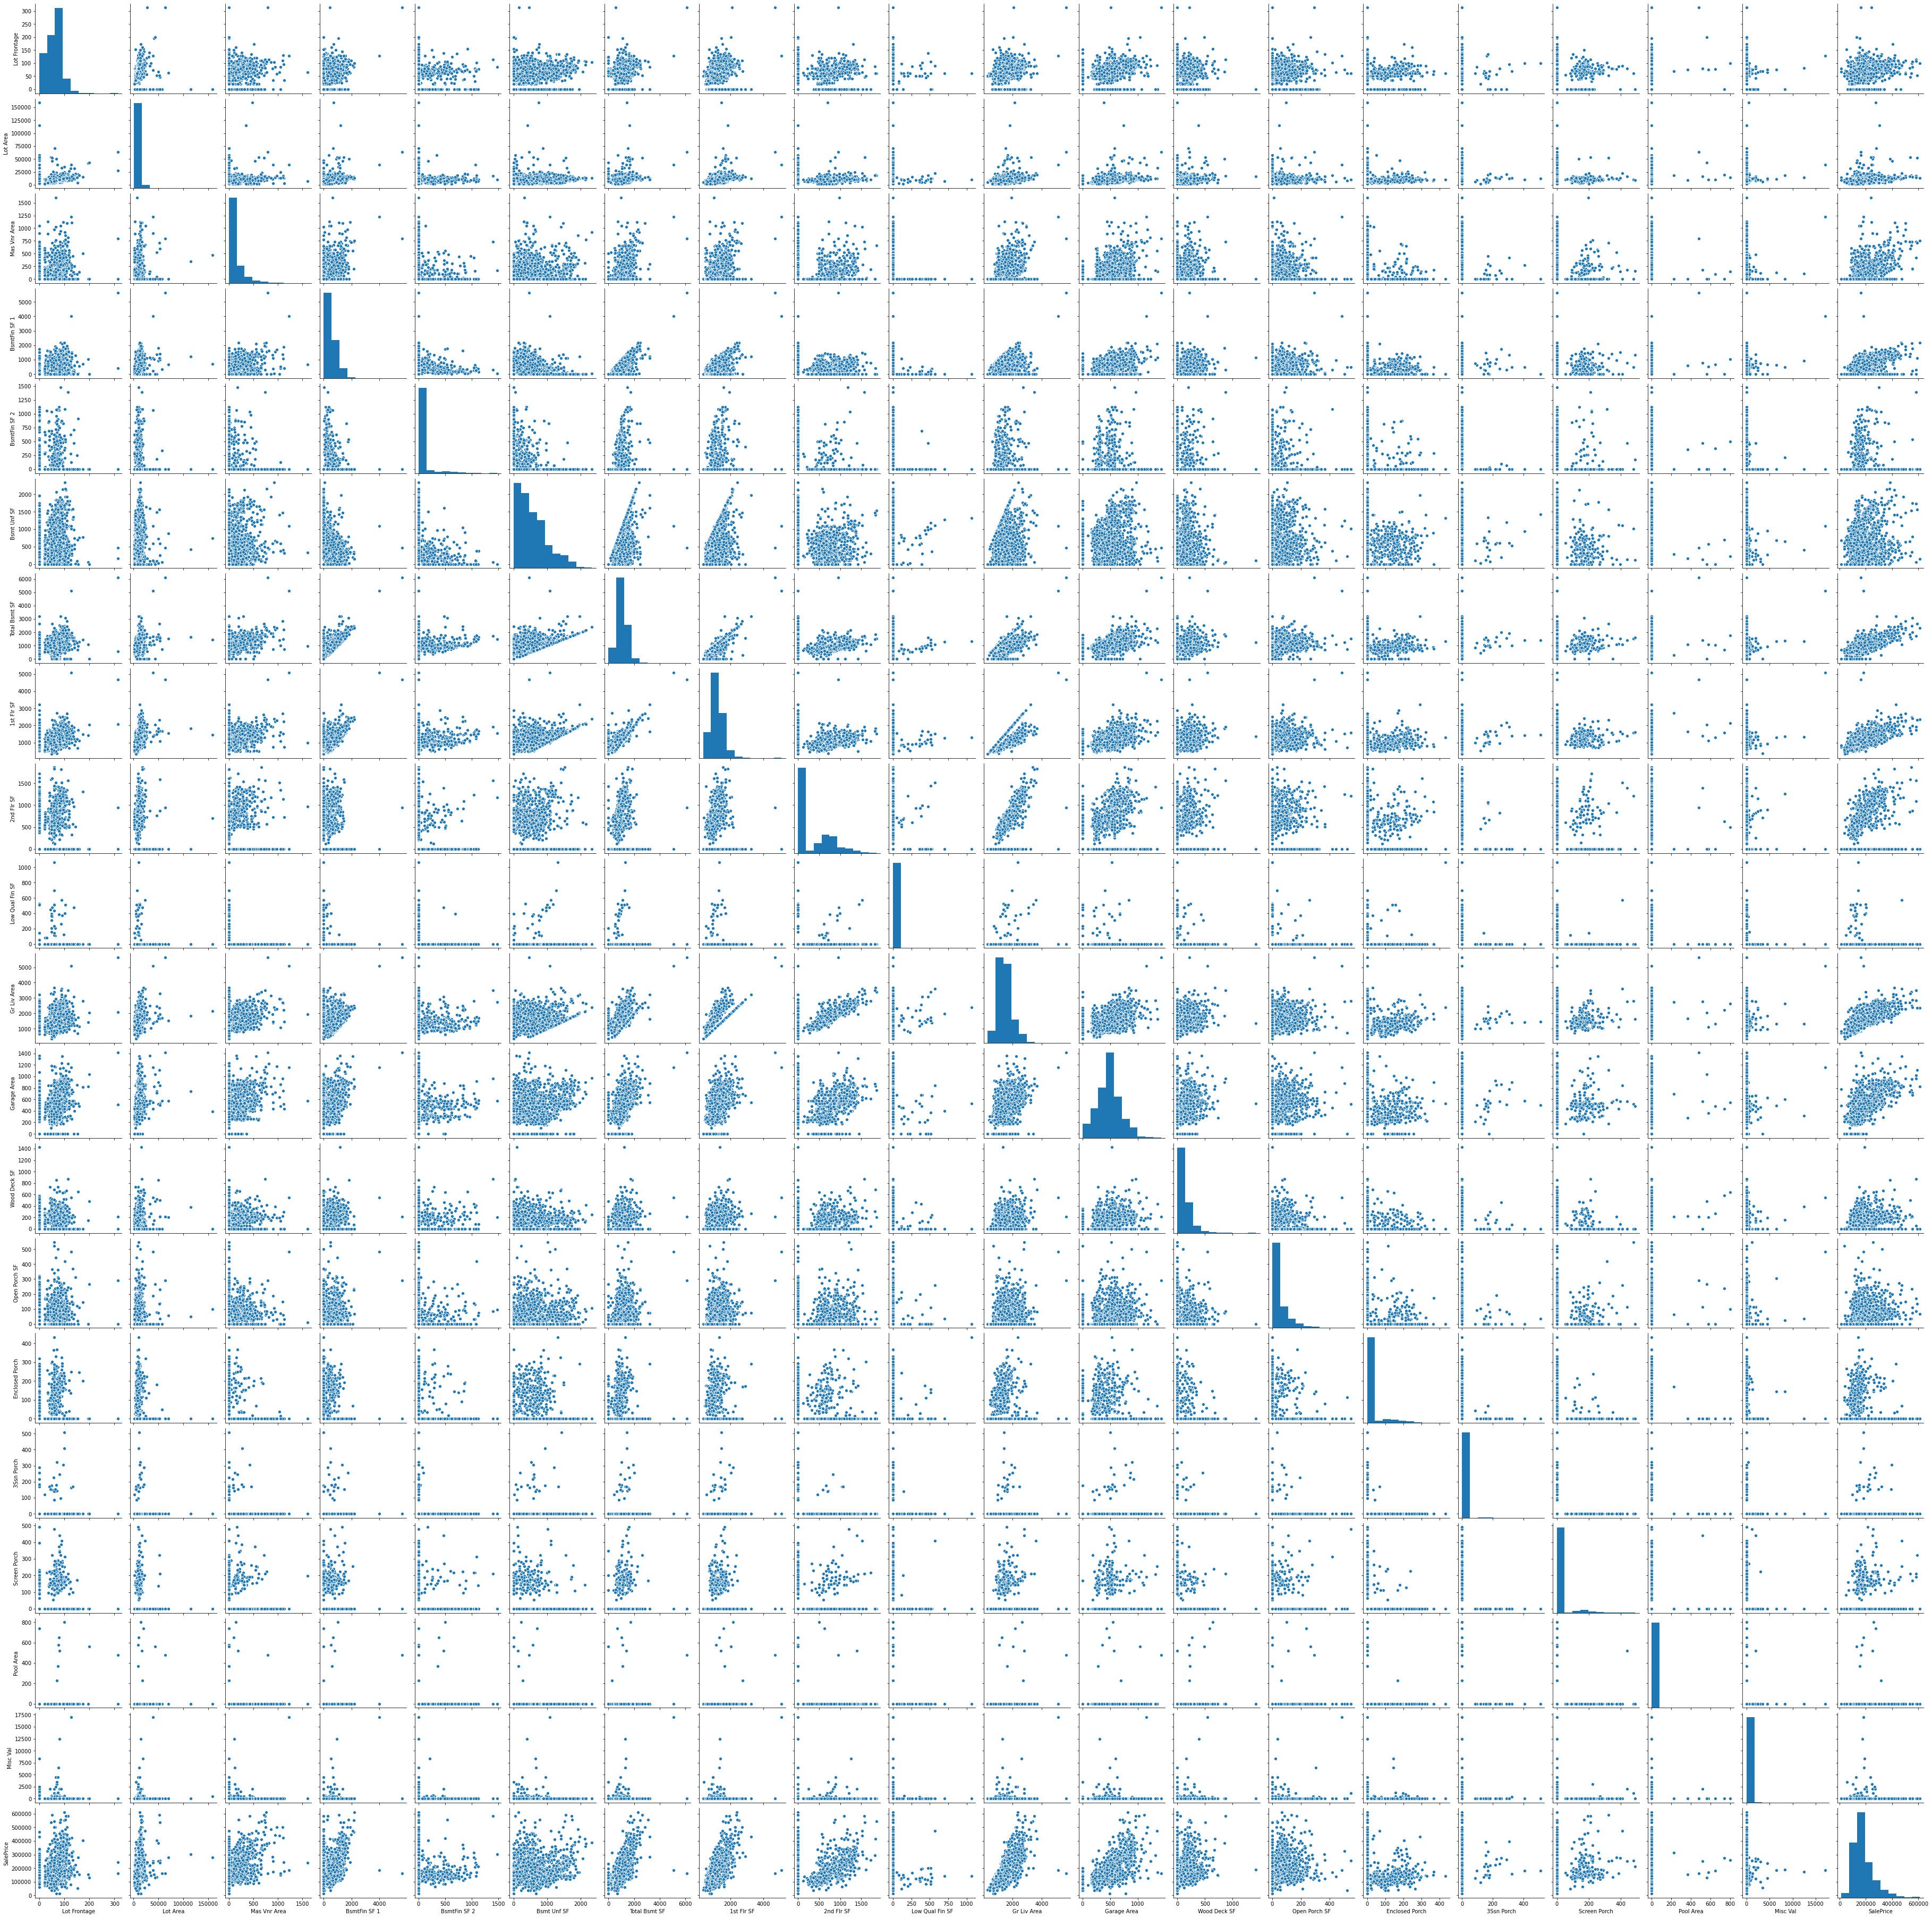

In [24]:
plt.figure(figsize=(12,12))

sns.pairplot(pd.concat([df[continuous_features],df['SalePrice']], axis = 1))

## Explore Discrete Features

In [39]:
df[discrete_features]

,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,Yr Sold
0,1976,2005,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,3,2010
1,1996,1997,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,4,2009
2,1953,2007,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,1,2010
3,2006,2007,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,4,2010
4,1900,1993,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,2007,2007,1.0,0.0,2,0,3,1,7,1,2007.0,2.0,1,2008
2022,1940,1950,0.0,0.0,1,0,1,1,4,0,1961.0,2.0,3,2009
2023,1928,1950,0.0,0.0,1,1,3,1,9,1,1929.0,2.0,3,2009
2024,1956,1956,1.0,0.0,1,0,3,1,6,2,1956.0,1.0,11,2009


In [40]:
df[discrete_features].describe()

,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,Yr Sold
count,2026.000000,2026.00000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
mean,1971.415597,1983.98075,0.427443,0.064166,1.571570,0.367720,2.843534,1.042942,6.434353,0.589339,1868.990128,1.773445,6.210267,2007.778875
std,30.145229,21.03601,0.522971,0.253039,0.547101,0.499406,0.826535,0.209955,1.559957,0.638025,452.869672,0.765623,2.742480,1.314860
min,1872.000000,1950.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1953.000000,1964.00000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,4.000000,2007.000000
50%,1974.000000,1993.00000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,6.000000,2008.000000
75%,2000.000000,2004.00000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,8.000000,2009.000000
max,2010.000000,2010.00000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2010.000000,5.000000,12.000000,2010.000000


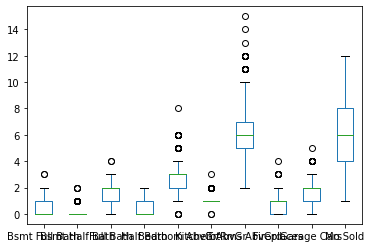

In [41]:
df[discrete_features].drop(columns = ['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold']).plot.box()

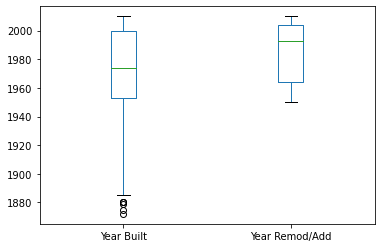

In [42]:
df[['Year Built','Year Remod/Add']].plot.box()

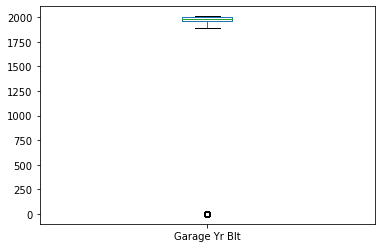

In [43]:
df['Garage Yr Blt'].plot.box()

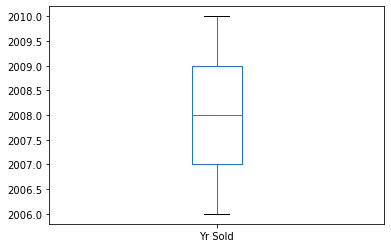

In [44]:
df['Yr Sold'].plot.box()

In [45]:
df[['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold','SalePrice']]

,Year Built,Year Remod/Add,Garage Yr Blt,Yr Sold,SalePrice
0,1976,2005,1976.0,2010,130500
1,1996,1997,1997.0,2009,220000
2,1953,2007,1953.0,2010,109000
3,2006,2007,2007.0,2010,174000
4,1900,1993,1957.0,2010,138500
...,...,...,...,...,...
2021,2007,2007,2007.0,2008,298751
2022,1940,1950,1961.0,2009,82500
2023,1928,1950,1929.0,2009,177000
2024,1956,1956,1956.0,2009,144000


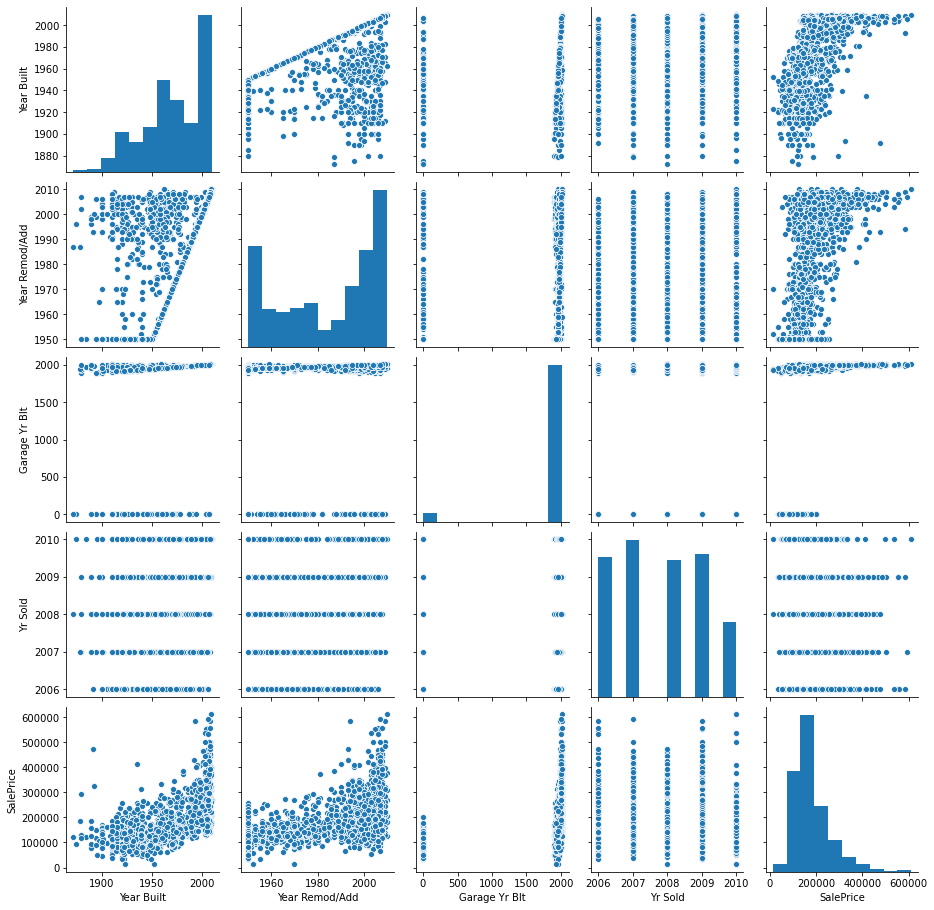

In [46]:
sns.pairplot(df[['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold','SalePrice']]);

In [47]:
df_discrete = df[discrete_features].drop(columns = ['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold'])

In [48]:
pd.concat([df_discrete,df['SalePrice']], axis = 1)

,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Mo Sold,SalePrice
0,0.0,0.0,2,1,3,1,6,0,2.0,3,130500
1,1.0,0.0,2,1,4,1,8,1,2.0,4,220000
2,1.0,0.0,1,0,3,1,5,0,1.0,1,109000
3,0.0,0.0,2,1,3,1,7,0,2.0,4,174000
4,0.0,0.0,2,0,3,1,6,0,2.0,3,138500
...,...,...,...,...,...,...,...,...,...,...,...
2021,1.0,0.0,2,0,3,1,7,1,2.0,1,298751
2022,0.0,0.0,1,0,1,1,4,0,2.0,3,82500
2023,0.0,0.0,1,1,3,1,9,1,2.0,3,177000
2024,1.0,0.0,1,0,3,1,6,2,1.0,11,144000


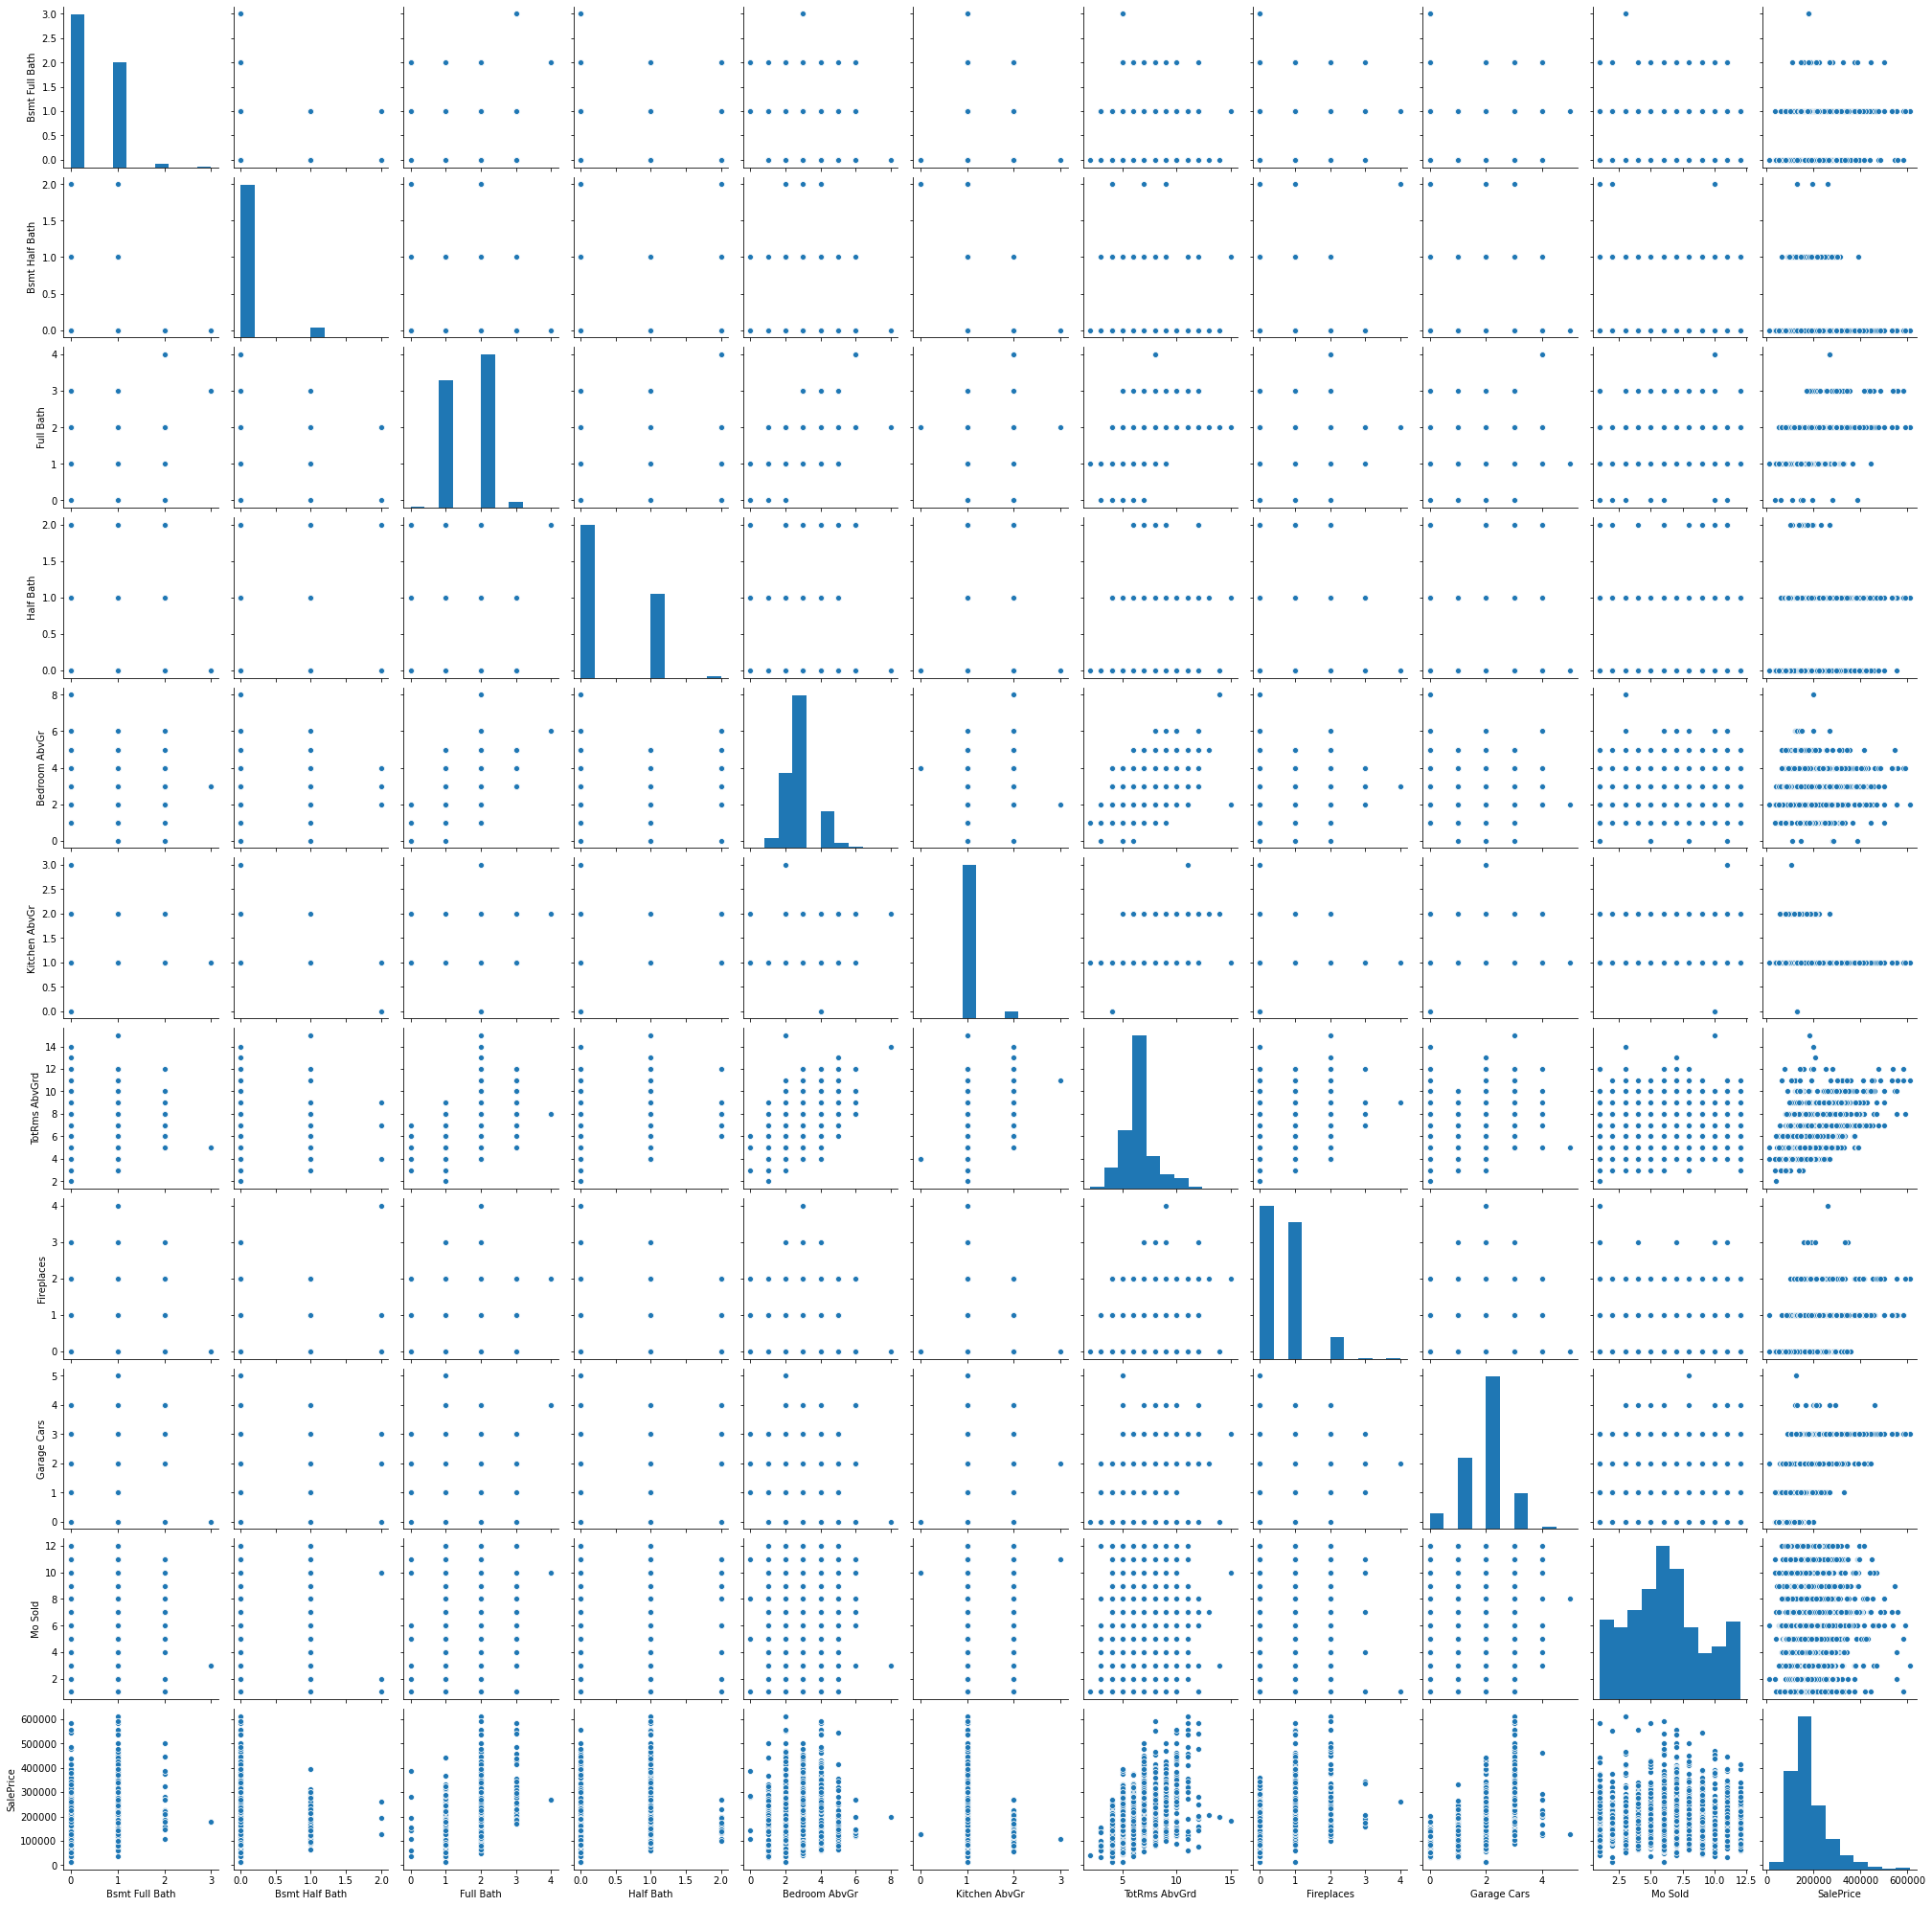

In [49]:
sns.pairplot(pd.concat([df_discrete,df['SalePrice']], axis = 1));

In [50]:
corr = pd.concat([df_discrete,df['SalePrice']], axis = 1).corr()['SalePrice']

In [51]:
corr_columns = corr[np.abs(corr)>.2]

In [52]:
corr_columns.index

Index(['Bsmt Full Bath', 'Full Bath', 'Half Bath', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Cars', 'SalePrice'],
      dtype='object')

# Explore looking at month/year sold together, but decide they don't provide additional value

In [53]:
str(df['Mo Sold'][5]) + ' ' + str(df['Yr Sold'][6])

'6 2006'

In [54]:
df['Mo Sold'].apply(lambda x: datetime.strptime(str(x), '%m') )

0      1900-03-01
1      1900-04-01
2      1900-01-01
3      1900-04-01
4      1900-03-01
          ...    
2021   1900-01-01
2022   1900-03-01
2023   1900-03-01
2024   1900-11-01
2025   1900-06-01
Name: Mo Sold, Length: 2026, dtype: datetime64[ns]

In [55]:
df['Mo Yr Sold'] = df['Mo Sold']*10_000 + df['Yr Sold']

df['Mo Yr Sold']

0        32010
1        42009
2        12010
3        42010
4        32010
         ...  
2021     12008
2022     32009
2023     32009
2024    112009
2025     62010
Name: Mo Yr Sold, Length: 2026, dtype: int64

In [56]:
df['MoYr Sold dt']=df['Mo Yr Sold'].apply(lambda x: datetime.strptime(str(x), '%m%Y') )

Text(0.5, 1.0, 'Month/Year vs Sale Price')

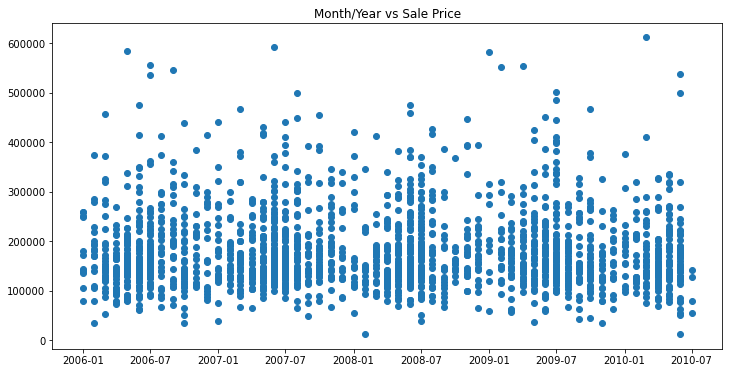

In [57]:
plt.figure(figsize = (12,6))

plt.scatter(df['MoYr Sold dt'],df['SalePrice'])
plt.title('Month/Year vs Sale Price')

There isn't any strong correlation in the graph that shows creating a new feature will provide any benefit, so do not add.

# Notebook Summary:

In this notebook, I use my cleaned training data, then focus only on the discrete and continuous features.

I mostly perform EDA of both features in this notebook to see any trends.

I also try looking at whether adding a column that combines month and year will provide additional information, but graphing the relationship to Sale Price shows no trend, so I don't add this column to the dataframe.